In [28]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [29]:
#load dataset
file_path = 'course files/gapminder.csv'
gapminder_df = pd.read_csv(file_path, low_memory=False)

In [30]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%f' %x)

In [31]:
#print out the number of rows (observations) in the dataset
print(len(gapminder_df))

213


In [32]:
#print out number of columns in the dataset
print(len(gapminder_df.columns))

16


#### Select columns needed for the research project

In [33]:
#select the variables needed for project
gapminder_df = gapminder_df[['country', 'incomeperperson','oilperperson', 'co2emissions', 'relectricperperson']]
gapminder_df.head(6)

,country,incomeperperson,oilperperson,co2emissions,relectricperperson
0,Afghanistan,,,75944000,
1,Albania,1914.996551,,223747333.3,636.3413834
2,Algeria,2231.993335,0.420094525,2932108667,590.5098143
3,Andorra,21943.3399,,,
4,Angola,1381.004268,,248358000,172.9992274
5,Antigua and Barbuda,11894.46407,,16225000,


#### Dealing with missing data

In [34]:
#replace empty cells with nan
gapminder_df = gapminder_df.replace([""," "], np.nan, regex=True)

In [35]:
#convert object variables to numeric 

gapminder_df['incomeperperson'] = pd.to_numeric(gapminder_df['incomeperperson'])
gapminder_df['co2emissions'] = pd.to_numeric(gapminder_df['co2emissions'])
gapminder_df['oilperperson'] = pd.to_numeric(gapminder_df['oilperperson'])
gapminder_df['relectricperperson'] = pd.to_numeric(gapminder_df['relectricperperson'])


In [36]:
sub1 = gapminder_df.copy()

In [37]:
sub1.head(10)

,country,incomeperperson,oilperperson,co2emissions,relectricperperson
0,Afghanistan,nan,nan,75944000.000000,nan
1,Albania,1914.996551,nan,223747333.300000,636.341383
2,Algeria,2231.993335,0.420095,2932108667.000000,590.509814
3,Andorra,21943.339900,nan,nan,nan
4,Angola,1381.004268,nan,248358000.000000,172.999227
5,NaN,11894.464070,nan,16225000.000000,nan
6,Argentina,10749.419240,0.635944,5872119000.000000,768.428300
7,Armenia,1326.741757,nan,51219666.670000,603.763058
8,Aruba,nan,nan,35871000.000000,nan
9,Australia,25249.986060,1.913026,12970092667.000000,2825.391095


## Univariate analysis of each variable selected

Text(0.5, 1.0, 'Distribution of Oilperperson variable')

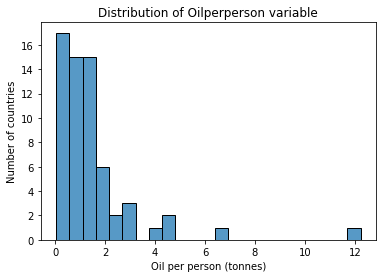

In [38]:
sns.histplot(sub1['oilperperson'].dropna())
plt.xlabel('Oil per person (tonnes)')
plt.ylabel('Number of countries')
plt.title('Distribution of Oilperperson variable')

In [39]:
sub1['oilperperson'].describe()

count   63.000000
mean     1.484085
std      1.825090
min      0.032281
25%      0.532541
50%      1.032470
75%      1.622737
max     12.228645
Name: oilperperson, dtype: float64

Text(0.5, 1.0, 'Distribution of Relectricperperson variable')

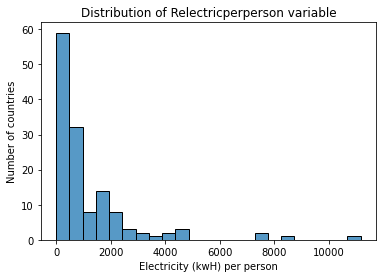

In [40]:
sns.histplot(sub1['relectricperperson'].dropna())
plt.xlabel('Electricity (kwH) per person')
plt.ylabel('Number of countries')
plt.title('Distribution of Relectricperperson variable')

In [41]:
sub1['relectricperperson'].describe()

count     136.000000
mean     1173.178995
std      1681.440173
min         0.000000
25%       203.652109
50%       597.136436
75%      1491.145249
max     11154.755030
Name: relectricperperson, dtype: float64

Text(0.5, 1.0, 'Distribution of Co2 Emissions variable')

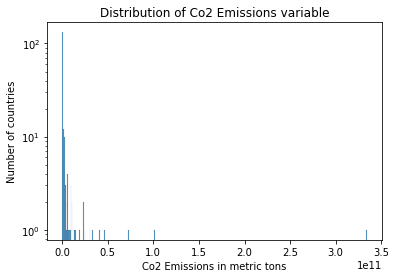

In [42]:
#Univariate histogram for co2emissions
sns.histplot(sub1['co2emissions'].dropna())
plt.xlabel('Co2 Emissions in metric tons')
plt.ylabel('Number of countries')
plt.yscale('log')
plt.title('Distribution of Co2 Emissions variable')

In [43]:
sub1['co2emissions'].describe()

count            200.000000
mean      5030226183.337608
std      25716667510.217167
min           132000.000000
25%         34846166.667500
50%        185901833.350000
75%       1846084166.500000
max     334000000000.000000
Name: co2emissions, dtype: float64

## Bivariate Analysis of explanatory and response variable

Text(0.5, 1.0, 'Scatter plot for the Association between Oil consumed per person and Co2 Emissions in Countries')

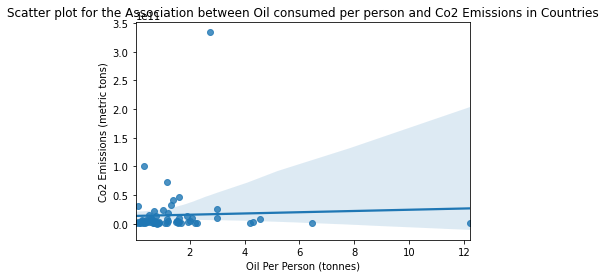

In [44]:
sns.regplot(x= sub1['oilperperson'], y= sub1['co2emissions'])
plt.xlabel('Oil Per Person (tonnes)')
plt.ylabel('Co2 Emissions (metric tons)')
plt.title('Scatter plot for the Association between Oil consumed per person and Co2 Emissions in Countries')

Text(0.5, 1.0, 'Scatter plot for the Association between Electricity per person and Co2Emissions')

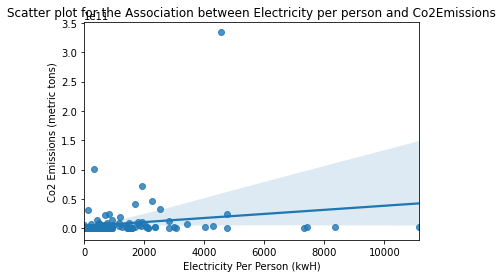

In [45]:
sns.regplot(x = sub1['relectricperperson'], y = sub1['co2emissions'])
plt.xlabel('Electricity Per Person (kwH)')
plt.ylabel('Co2 Emissions (metric tons)')
plt.title('Scatter plot for the Association between Electricity per person and Co2Emissions')

Text(0.5, 1.0, 'Scatter plot for the Association between Incomeperperson and Co2Emissions')

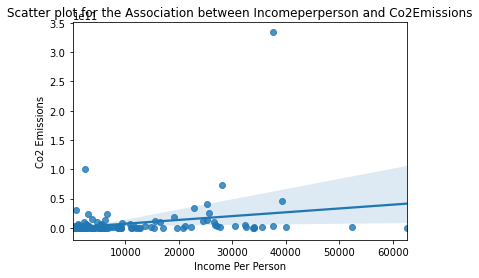

In [46]:
sns.regplot(x = sub1['incomeperperson'], y = sub1['co2emissions'])
plt.xlabel('Income Per Person')
plt.ylabel('Co2 Emissions')
plt.title('Scatter plot for the Association between Incomeperperson and Co2Emissions')

### Grouping the three variables into four categories (low, lower-medium, upper-medium and high)

In [47]:
sub1_copy = sub1.copy()

In [48]:
sub1_copy['oilgrp4'] = pd.qcut(sub1_copy['oilperperson'], 4, labels=['low level', 'lower-medium level', 'upper-medium level', 'high level'])
sub1_copy['incomegrp4'] = pd.qcut(sub1_copy['incomeperperson'], 4, labels=['low', 'lower-medium', 'upper-medium', 'high'])
sub1_copy['relectricgrp4'] = pd.qcut(sub1_copy['relectricperperson'], 4, labels=['low level', 'lower-medium level', 'upper-medium level', 'high level'])

In [49]:
c1 = sub1_copy['oilgrp4'].value_counts(sort=False, dropna=True)
c2 = sub1_copy['incomegrp4'].value_counts(sort=False, dropna=True)
c3 = sub1_copy['relectricgrp4'].value_counts(sort=False, dropna=True)

In [50]:
print('Oil per person - 4 categories - quartiles')
print(c1)

Oil per person - 4 categories - quartiles
low level             16
lower-medium level    16
upper-medium level    15
high level            16
Name: oilgrp4, dtype: int64


In [51]:
print('Income per person - 4 categories - quartiles')
print(c2)

Income per person - 4 categories - quartiles
low             48
lower-medium    47
upper-medium    47
high            48
Name: incomegrp4, dtype: int64


In [52]:
print('Residential Electric per person - 4 categories - quartiles')
print(c3)

Residential Electric per person - 4 categories - quartiles
low level             34
lower-medium level    34
upper-medium level    34
high level            34
Name: relectricgrp4, dtype: int64


### Bivariate graph for categorical explanatory and quantitative response variable

Text(0.5, 1.0, 'Bivariate analysis of Oil Group and Co2 Emissions')

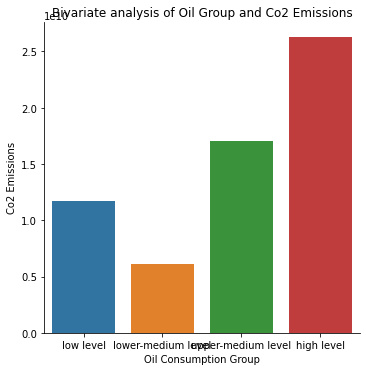

In [53]:
sns.catplot(x='oilgrp4', y='co2emissions', data=sub1_copy, kind='bar', ci=None)
plt.xlabel('Oil Consumption Group')
plt.ylabel('Co2 Emissions')
plt.title('Bivariate analysis of Oil Group and Co2 Emissions')

Text(0.5, 1.0, 'Bivariate analysis of Electric Group and Co2 Emissions')

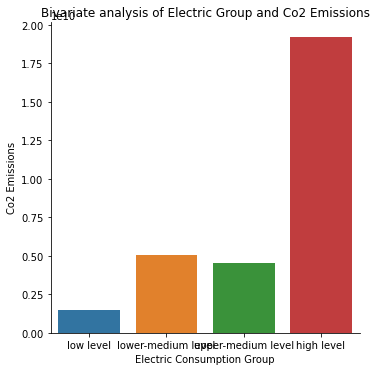

In [54]:
sns.catplot(x='relectricgrp4', y='co2emissions', data=sub1_copy, kind='bar', ci=None)
plt.xlabel('Electric Consumption Group')
plt.ylabel('Co2 Emissions')
plt.title('Bivariate analysis of Electric Group and Co2 Emissions')

Text(6.799999999999997, 0.5, 'Co2 Emissions')

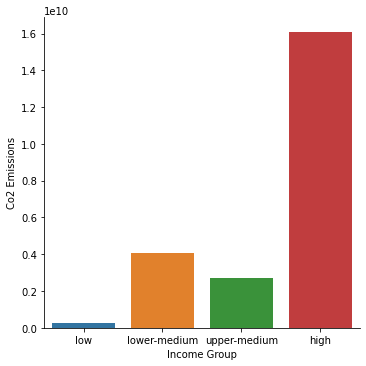

In [55]:
sns.catplot(x='incomegrp4', y='co2emissions', data=sub1_copy, kind='bar', ci=None)
plt.xlabel('Income Group')
plt.ylabel('Co2 Emissions')

----

### Refined research questions and hypothesis:
Ho(null hypothesis) : The level of oil and electricity consumption does not have an association with the carbon dioxide emitted in the environment.
Ha(alternative hypothesis) : The level of oil and electricity consumption is asscoiated with the carbon dioxide emitted in the environment.

Research Questions : 1) Does the level of oil consumed have an association with the carbondioxide emitted in the environment
                     2) Does the level of electricty consumed have an association with the carbob dioxide emitted in the     environment

### Performing Statistical test:  ANOVA (f test)

#### For oil consumption and co2 emitted:

In [56]:
model1 = smf.ols(formula='co2emissions ~ C(oilgrp4)', data=sub1_copy)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:           co2emissions   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.5854
Date:                Sun, 25 Oct 2020   Prob (F-statistic):              0.627
Time:                        13:21:23   Log-Likelihood:                -1632.4
No. Observations:                  63   AIC:                             3273.
Df Residuals:                      59   BIC:                             3281.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [57]:
sub1_oilgrp = sub1_copy[['co2emissions', 'oilgrp4']].dropna()

In [58]:
print('means for co2emissions by level of oil consumption')
m1 = sub1_oilgrp.groupby('oilgrp4').mean()
print(m1)

means for co2emissions by level of oil consumption
                         co2emissions
oilgrp4                              
low level          11745679125.043751
lower-medium level  6131116979.075000
upper-medium level 17066350155.580000
high level         26272149770.875000


In [59]:
print('standard deviations for co2emissions by level of oil consumption')
sd1 = sub1_oilgrp.groupby('oilgrp4').std()
print(sd1)

standard deviations for co2emissions by level of oil consumption
                         co2emissions
oilgrp4                              
low level          24938402982.159180
lower-medium level  7520731639.301509
upper-medium level 21515181728.248562
high level         82304085858.993439


#### For Electrcity consumption and Co2 emissions:

In [60]:
sub1_electricgrp = sub1_copy[['co2emissions', 'relectricgrp4']].dropna()

In [61]:
print('The means of co2emissions by level of electricity consumed')
m2 = sub1_electricgrp.groupby('relectricgrp4').mean()
print(m2)

The means of co2emissions by level of electricity consumed
                         co2emissions
relectricgrp4                        
low level           1460316647.085382
lower-medium level  5052569990.197942
upper-medium level  4514273444.432424
high level         19205925898.998787


In [62]:
print('The standard deviations of co2emissions by level of electricity consumed')
sd2 = sub1_electricgrp.groupby('relectricgrp4').std()
print(sd2)

The standard deviations of co2emissions by level of electricity consumed
                         co2emissions
relectricgrp4                        
low level           5245444399.843637
lower-medium level 17226232137.959614
upper-medium level  6603789076.486851
high level         58839542791.522667


In [63]:
model2 = smf.ols(formula='co2emissions ~ C(relectricgrp4)', data=sub1_electricgrp).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           co2emissions   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.208
Date:                Sun, 25 Oct 2020   Prob (F-statistic):             0.0903
Time:                        13:21:24   Log-Likelihood:                -3424.1
No. Observations:                 134   AIC:                             6856.
Df Residuals:                     130   BIC:                             6868.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

## Added 2010 Country population to calculate the indicators for all country population

In [64]:
population_df = pd.read_csv('course files/population_total.csv')


In [65]:
population_2010 = population_df[['country', '2010']]
population_2010.columns = ['country', 'population'] 
population_2010.head()

,country,population
0,Afghanistan,29200000
1,Albania,2950000
2,Algeria,36000000
3,Andorra,84500
4,Angola,23400000


In [66]:
sub1_updated = sub1.merge(population_2010, on='country')
sub1_updated.head(10)

,country,incomeperperson,oilperperson,co2emissions,relectricperperson,population
0,Afghanistan,nan,nan,75944000.000000,nan,29200000
1,Albania,1914.996551,nan,223747333.300000,636.341383,2950000
2,Algeria,2231.993335,0.420095,2932108667.000000,590.509814,36000000
3,Andorra,21943.339900,nan,nan,nan,84500
4,Angola,1381.004268,nan,248358000.000000,172.999227,23400000
5,Argentina,10749.419240,0.635944,5872119000.000000,768.428300,40900000
6,Armenia,1326.741757,nan,51219666.670000,603.763058,2880000
7,Australia,25249.986060,1.913026,12970092667.000000,2825.391095,22200000
8,Austria,26692.984110,1.548791,4466084333.000000,2068.123309,8410000
9,Azerbaijan,2344.896916,0.359173,511107666.700000,921.562111,9030000


In [67]:
sub1.head()

,country,incomeperperson,oilperperson,co2emissions,relectricperperson
0,Afghanistan,nan,nan,75944000.000000,nan
1,Albania,1914.996551,nan,223747333.300000,636.341383
2,Algeria,2231.993335,0.420095,2932108667.000000,590.509814
3,Andorra,21943.339900,nan,nan,nan
4,Angola,1381.004268,nan,248358000.000000,172.999227


In [68]:
sub2 = sub1_updated.copy()
sub2['totalIncome'] = sub2['incomeperperson'] * sub2['population']
sub2['totalOilConsumed'] = sub2['oilperperson'] * sub2['population']
sub2['totalElectricConsumed'] = sub2['relectricperperson'] * sub2['population']
sub2 = sub2[['country', 'totalIncome', 'totalOilConsumed', 'totalElectricConsumed', 'co2emissions']]
sub2.head()

,country,totalIncome,totalOilConsumed,totalElectricConsumed,co2emissions
0,Afghanistan,nan,nan,nan,75944000.000000
1,Albania,5649239825.450001,nan,1877207081.030000,223747333.300000
2,Algeria,80351760060.000000,15123402.900000,21258353314.799995,2932108667.000000
3,Andorra,1854212221.550000,nan,nan,nan
4,Angola,32315499871.199997,nan,4048181921.160000,248358000.000000


### Display histograms for the quantitative variables in the dataset

<AxesSubplot:xlabel='totalOilConsumed', ylabel='Count'>

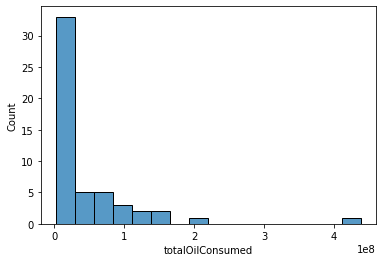

In [69]:
sns.histplot(sub2['totalOilConsumed'])


<AxesSubplot:xlabel='totalElectricConsumed', ylabel='Count'>

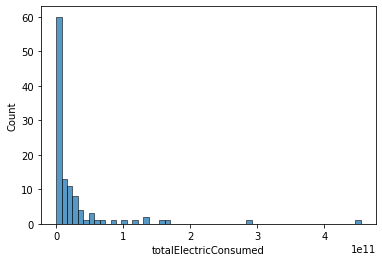

In [70]:
sns.histplot(sub2['totalElectricConsumed'])

<AxesSubplot:xlabel='totalIncome', ylabel='Count'>

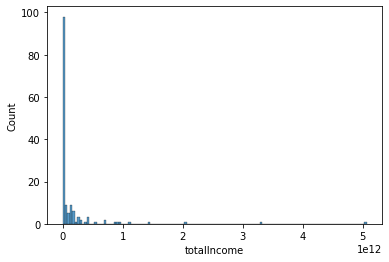

In [71]:
sns.histplot(sub2['totalIncome'])

### Display measures of shape and spread

In [72]:
totalIncome = sub2['totalIncome'].describe()
print(totalIncome)

count             148.000000
mean     171278329352.306458
std      555876778048.392700
min          18006900.345000
25%        3447239904.550000
50%       16817484141.209999
75%      111152419562.299988
max     5070922772940.000000
Name: totalIncome, dtype: float64


In [89]:
totalOil = sub2['totalOilConsumed'].describe()
print(totalOil)

count          52.000000
mean     46667730.990138
std      71427634.220849
min       2534592.646560
25%       9982874.416508
50%      16437652.584150
75%      60779988.806175
max     437759345.530000
Name: totalOilConsumed, dtype: float64


In [90]:
totalElectric = sub2['totalElectricConsumed'].describe()
print(totalElectric)

count            111.000000
mean     25671507345.838070
std      58364860627.385704
min                0.000000
25%       1848993383.790000
50%       6753752908.790000
75%      21667603036.785000
max     453985985839.999939
Name: totalElectricConsumed, dtype: float64


In [91]:
Co2Emissions = sub2['co2emissions'].describe()
print(Co2Emissions)

count            146.000000
mean      3741369815.076869
std      10943733349.472486
min           850666.666700
25%         53697416.667500
50%        276457500.000000
75%       2372442416.500000
max     101000000000.000000
Name: co2emissions, dtype: float64


### Bivariate analysis of explanatory variable and response variable (scatterplot)

Text(0.5, 1.0, ' Scatter plot for the Association between total electricity consumed and Co2 emitted')

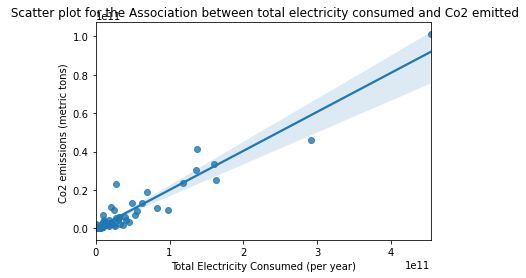

In [92]:
sns.regplot(x= sub2['totalElectricConsumed'], y = sub2['co2emissions'])
plt.xlabel('Total Electricity Consumed (per year)')
plt.ylabel('Co2 emissions (metric tons) ')
plt.title(' Scatter plot for the Association between total electricity consumed and Co2 emitted', fontsize=12)

Text(0.5, 1.0, ' Scatter plot for the Association between total oil consumed and Co2 emitted')

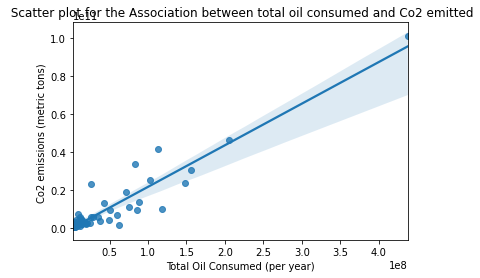

In [93]:
sns.regplot(x = sub2['totalOilConsumed'], y = sub2['co2emissions'])
plt.xlabel('Total Oil Consumed (per year)')
plt.ylabel('Co2 emissions (metric tons) ')
plt.title(' Scatter plot for the Association between total oil consumed and Co2 emitted', fontsize=12)

Text(0.5, 1.0, ' Scatter plot for the Association between total GDP (of one year) and Co2 emitted')

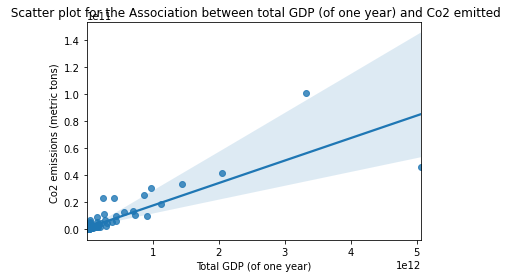

In [94]:
sns.regplot(x = sub2['totalIncome'], y= sub2['co2emissions'])
plt.xlabel('Total GDP (of one year)')
plt.ylabel('Co2 emissions (metric tons) ')
plt.title(' Scatter plot for the Association between total GDP (of one year) and Co2 emitted', fontsize=12)

In [77]:
sub2.head()

,country,totalIncome,totalOilConsumed,totalElectricConsumed,co2emissions
0,Afghanistan,nan,nan,nan,75944000.000000
1,Albania,5649239825.450001,nan,1877207081.030000,223747333.300000
2,Algeria,80351760060.000000,15123402.900000,21258353314.799995,2932108667.000000
3,Andorra,1854212221.550000,nan,nan,nan
4,Angola,32315499871.199997,nan,4048181921.160000,248358000.000000


### Group the quantitative explanatory variable into 4 quartiles

In [78]:
sub2['totaloilgrp4'] = pd.qcut(sub2['totalOilConsumed'], 4, labels=['low level', 'lower-medium level', 'upper-medium level', 'high level'])
sub2['totalincomegrp4'] = pd.qcut(sub2['totalIncome'], 4, labels=['low', 'lower-medium', 'upper-medium', 'high'])
sub2['totalrelectricgrp4'] = pd.qcut(sub2['totalElectricConsumed'], 4, labels=['low level', 'lower-medium level', 'upper-medium level', 'high level'])

In [79]:
sub2.head()

,country,totalIncome,totalOilConsumed,totalElectricConsumed,co2emissions,totaloilgrp4,totalincomegrp4,totalrelectricgrp4
0,Afghanistan,nan,nan,nan,75944000.000000,NaN,NaN,NaN
1,Albania,5649239825.450001,nan,1877207081.030000,223747333.300000,NaN,lower-medium,lower-medium level
2,Algeria,80351760060.000000,15123402.900000,21258353314.799995,2932108667.000000,lower-medium level,upper-medium,upper-medium level
3,Andorra,1854212221.550000,nan,nan,nan,NaN,low,NaN
4,Angola,32315499871.199997,nan,4048181921.160000,248358000.000000,NaN,upper-medium,lower-medium level


Text(0.5, 1.0, 'Bivariate analysis of Total Oil Group and Co2 Emissions')

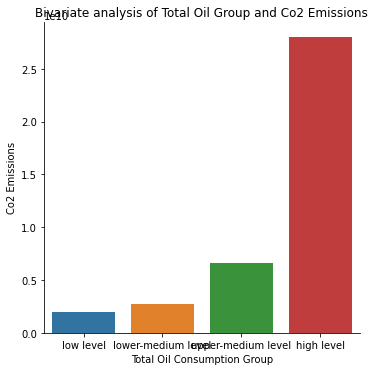

In [81]:
sns.catplot(x='totaloilgrp4', y='co2emissions', data=sub2, kind='bar', ci=None)
plt.xlabel('Total Oil Consumption Group')
plt.ylabel('Co2 Emissions')
plt.title('Bivariate analysis of Total Oil Group and Co2 Emissions')

Text(0.5, 1.0, 'Bivariate analysis of Total Electricity Consumption Group and Co2 Emissions')

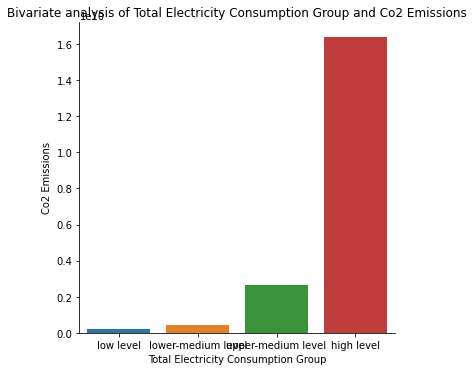

In [82]:
sns.catplot(x='totalrelectricgrp4', y='co2emissions', data=sub2, kind='bar', ci=None)
plt.xlabel('Total Electricity Consumption Group')
plt.ylabel('Co2 Emissions')
plt.title('Bivariate analysis of Total Electricity Consumption Group and Co2 Emissions')

### Statistical Tests - ANOVA test

In [83]:
sub2_electric = sub2[['totalrelectricgrp4','co2emissions']].dropna()

In [85]:
print('Means of co2 emissions across the oil consumption categories')
m1 = sub2_electric.groupby('totalrelectricgrp4').mean()
print(m1)

Means of co2 emissions across the oil consumption categories
                         co2emissions
totalrelectricgrp4                   
low level            238190464.303571
lower-medium level   406898119.061786
upper-medium level  2631571743.538462
high level         16384895547.678572


In [84]:
sub2_oil = sub2[['totaloilgrp4', 'co2emissions']].dropna()

In [86]:
print('Means of co2 emissions across the oil consumption categories')
m1 = sub2_oil.groupby('totaloilgrp4').mean()
print(m1)

Means of co2 emissions across the oil consumption categories
                         co2emissions
totaloilgrp4                         
low level           2014415333.307692
lower-medium level  2709198179.484616
upper-medium level  6627042230.769231
high level         27990587743.692307


In [87]:
model1 = smf.ols(formula='co2emissions ~ C(totaloilgrp4)', data=sub2_oil)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:           co2emissions   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     11.24
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           1.05e-05
Time:                        13:34:20   Log-Likelihood:                -1283.5
No. Observations:                  52   AIC:                             2575.
Df Residuals:                      48   BIC:                             2583.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [88]:
model1 = smf.ols(formula='co2emissions ~ C(totalrelectricgrp4)', data=sub2_electric)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:           co2emissions   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     15.09
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           3.00e-08
Time:                        13:35:19   Log-Likelihood:                -2692.3
No. Observations:                 110   AIC:                             5393.
Df Residuals:                     106   BIC:                             5404.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------